CIFAR-10 classification with k-NN
---

> **Exercise**: Load the data from the `cifar10-6k.npz` file into X/y arrays. The data type of the input matrix `X` should be `float64`. Split it into train (5,000 images) and test (1,000) sets using the `train_test_split()` function. Set the `random_state` to zero. 

In [1]:
import numpy as np
import os

# Load the numpy .npz file
with np.load(os.path.join('cifar10-6k.npz'), allow_pickle=False) as data:
    cifar10_data = dict(data.items())
    
print('Data loaded')
print('It is a dictionary with keys:', list(cifar10_data.keys()))

Data loaded
It is a dictionary with keys: ['data', 'labels', 'names']


In [2]:
# Create X/y arrays
X = cifar10_data['data']
y = cifar10_data['labels']

print('X:', X.shape, X.dtype)
print('y:', y.shape, y.dtype)

X: (6000, 3072) uint8
y: (6000,) int32


In [3]:
from sklearn.model_selection import train_test_split

# Convert the type of the input matrix to float
X = X.astype(np.float64)

# Split data into train/test sets
X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, train_size=5000, test_size=1000, random_state=0)

Exercise: Data exploration
---

The ten categories are numerically encoded with digits between 0 and 9.

| digit | category   | digit | category   |
|-------|------------|-------|------------|
| 0     | airplane   | 5     | dog        |
| 1     | automobile | 6     | frog       |
| 2     | bird       | 7     | horse      |
| 3     | cat        | 8     | ship       |
| 4     | deer       | 9     | truck      |

> **Exercise**: What is the proportion of images in each category? Plot a few images from the data set.

In [4]:
import pandas as pd

pd.value_counts(y, normalize=True)

8    0.103333
2    0.103167
6    0.102667
9    0.102167
4    0.101833
0    0.101667
7    0.099500
5    0.097167
3    0.096667
1    0.091833
dtype: float64

Label: 5


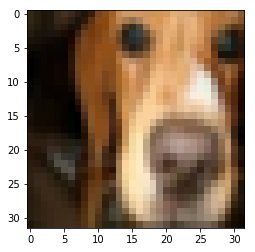

Label: 3


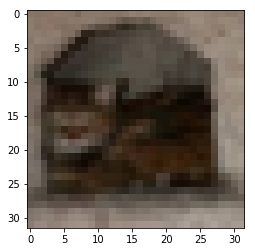

Label: 6


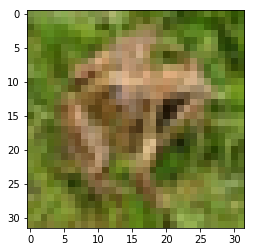

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

# Function to plot the i-th image from some X/y arrays
def show_image(idx, X, y):
    # Get image pixels from the input matrix X
    flat_img = X[idx] 
    
    # Reshape image into a 32 x 32 x 3 colors 
    img = flat_img.reshape(32, 32,3)
    
    # Print label using the output vector y
    print('Label:', y[idx])
    
    # Plot image with pyplot
    plt.imshow(img/255)
    plt.show()
    
# Show the first images from the training set
show_image(0, X_tr, y_tr)
show_image(1, X_tr, y_tr)
show_image(2, X_tr, y_tr)

Exercise: Fit a *k*-NN classifier
---

> **Exercise**: Create a *k*-NN classifer and tune it using grid search for the following hyperparameters.
> 1. The number of neighbors: define a set of reasonable values
> 1. The weighting function: "uniform" or "distance"
> 1. The distance metric: L1 or L2

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Create a k-NN classifier with default values
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Fit to train data
pipe.fit(X_tr, y_tr)

# Evaluate on test set
accuracy = pipe.score(X_te, y_te)
print('Accuracy: {:.3f}'.format(accuracy))

Accuracy: 0.272


In [7]:
# Define a set of reasonable values
k_values = np.arange(1, 21) # 1, 2, 3, .., 20
weights_functions = ['uniform', 'distance']
distance_types = [1, 2] # L1, L2 distances

In [8]:
from sklearn.model_selection import ParameterGrid

# Define a grid of values
grid = ParameterGrid({
    'knn__n_neighbors': k_values,
    'knn__weights': weights_functions,
    'knn__p': distance_types
})

len(grid)

80

In [9]:


# Save accuracy on test set
test_scores = []

for params_dict in grid:
    # Set parameters
    pipe.set_params(**params_dict)

    # Fit a k-NN classifier
    pipe.fit(X_tr, y_tr)

    # Save accuracy on test set
    params_dict['accuracy'] = pipe.score(X_te, y_te)

    # Save result
    test_scores.append(params_dict)

In [10]:
# Create DataFrame with test scores
scores_df = pd.DataFrame(test_scores)

# Top five scores
scores_df.sort_values(by='accuracy', ascending=False).head()

,accuracy,knn__n_neighbors,knn__p,knn__weights
29,0.344,8,1,distance
33,0.344,9,1,distance
41,0.333,11,1,distance
77,0.332,20,1,distance
25,0.332,7,1,distance
